# 🧠 Day 3 – SQL via Python: NYC School Data Exploration
In this notebook, you'll connect to a PostgreSQL database and execute SQL queries to explore NYC school data.

## 🔌 Step 1: Import Libraries

In [4]:
import pandas as pd
import psycopg2

## 🔐 Step 2: Connect to the Database

In [6]:
# DB connection setup using hardcoded credentials (for onboarding only)
conn = psycopg2.connect(
    dbname="neondb",
    user="neondb_owner",
    password="npg_CeS9fJg2azZD",
    host="ep-falling-glitter-a5m0j5gk-pooler.us-east-2.aws.neon.tech",
    port="5432",
    sslmode="require"
)
cur = conn.cursor()

## 🔍 Step 3: Run a Test Query

In [8]:
query = "SELECT * FROM nyc_schools.high_school_directory LIMIT 5;"
df = pd.read_sql(query, conn)
df.head()

/var/folders/y9/srbf597x2bb69ljy9yb9xgxh0000gn/T/ipykernel_71186/1731849884.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,number_programs,Location 1,Community Board,Council District,Census Tract,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,None,None,...,1,"{'latitude': '40.601989336', 'longitude': '-73...",14,31,100802,20529,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,None,None,...,1,"{'latitude': '40.593593811', 'longitude': '-73...",13,47,306,17616,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,None,None,...,1,"{'latitude': '40.692133704', 'longitude': '-73...",3,36,291,18181,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,None,None,...,1,"{'latitude': '40.822303765', 'longitude': '-73...",9,18,16,11611,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,None,None,...,6,"{'latitude': '40.773670507', 'longitude': '-73...",7,6,151,12420,20,4,19,12


## ✅ Task Queries Below

In [13]:
# Example: Count schools by borough
query = """
SELECT borough, COUNT(DISTINCT dbn) AS unique_school_count
FROM nyc_schools.high_school_directory
GROUP BY borough;
"""
df_result = pd.read_sql(query, conn)
df_result

/var/folders/y9/srbf597x2bb69ljy9yb9xgxh0000gn/T/ipykernel_71186/1934242491.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_result = pd.read_sql(query, conn)


,borough,unique_school_count
0,Bronx,118
1,Brooklyn,121
2,Manhattan,106
3,Queens,80
4,Staten Island,10


In [15]:
# Question 2: What is the average % of English Language Learners (ELL) per borough?

query = """
SELECT 
    hs.borough, 
    ROUND(AVG(sd.ell_percent)::numeric, 2) AS avg_ell_percent
FROM nyc_schools.school_demographics sd
LEFT JOIN nyc_schools.high_school_directory hs
    ON sd.dbn = hs.dbn
WHERE sd.ell_percent IS NOT NULL
GROUP BY hs.borough
ORDER BY hs.borough;
"""

df_ell = pd.read_sql(query, conn)
df_ell

/var/folders/y9/srbf597x2bb69ljy9yb9xgxh0000gn/T/ipykernel_71186/1317799625.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ell = pd.read_sql(query, conn)


,borough,avg_ell_percent
0,Manhattan,7.57
1,None,12.71


In [17]:
query = """
SELECT 
    hs.borough,
    hs.school_name,
    sd.ell_percent
FROM nyc_schools.school_demographics sd
JOIN nyc_schools.high_school_directory hs
    ON sd.dbn = hs.dbn
WHERE sd.ell_percent IS NOT NULL
ORDER BY hs.borough, sd.ell_percent DESC;
"""

df_ell_each_school = pd.read_sql(query, conn)
print(df_ell_each_school)


      borough                                        school_name  ell_percent
0   Manhattan      Henry Street School for International Studies         22.3
1   Manhattan      Henry Street School for International Studies         21.7
2   Manhattan                University Neighborhood High School         21.1
3   Manhattan      Henry Street School for International Studies         15.9
4   Manhattan                            Marta Valle High School         15.5
5   Manhattan                            Marta Valle High School         14.0
6   Manhattan                            Marta Valle High School         13.5
7   Manhattan                            Marta Valle High School         12.9
8   Manhattan                            Marta Valle High School         12.5
9   Manhattan                            Marta Valle High School         11.6
10  Manhattan                            Marta Valle High School         11.2
11  Manhattan                University Neighborhood High School

/var/folders/y9/srbf597x2bb69ljy9yb9xgxh0000gn/T/ipykernel_71186/1519296275.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ell_each_school = pd.read_sql(query, conn)


In [19]:
#🔗School supporting special needs
#Using the data from the school demographics and high school directory, write a query to find the top 3 schools in each borough with 
#the highest percentage of special education 
#students (sped_percent)

query = """
WITH ranked_sped AS (
    SELECT 
        hs.borough,
        hs.school_name,
        sd.sped_percent,
        ROW_NUMBER() OVER (PARTITION BY hs.borough ORDER BY sd.sped_percent DESC) AS rank
    FROM nyc_schools.school_demographics sd
    JOIN nyc_schools.high_school_directory hs
        ON sd.dbn = hs.dbn
    WHERE sd.sped_percent IS NOT NULL
)
SELECT borough, school_name, ROUND(sped_percent::numeric, 2) AS sped_percent
FROM ranked_sped
WHERE rank <= 3
ORDER BY borough, rank;
"""

df_sped_top3 = pd.read_sql(query, conn)
df_sped_top3

/var/folders/y9/srbf597x2bb69ljy9yb9xgxh0000gn/T/ipykernel_71186/3350505568.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sped_top3 = pd.read_sql(query, conn)


,borough,school_name,sped_percent
0,Manhattan,East Side Community School,28.8
1,Manhattan,East Side Community School,27.7
2,Manhattan,East Side Community School,26.7


/var/folders/y9/srbf597x2bb69ljy9yb9xgxh0000gn/T/ipykernel_71186/876870206.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ell, x='borough', y='avg_ell_percent', palette='viridis')


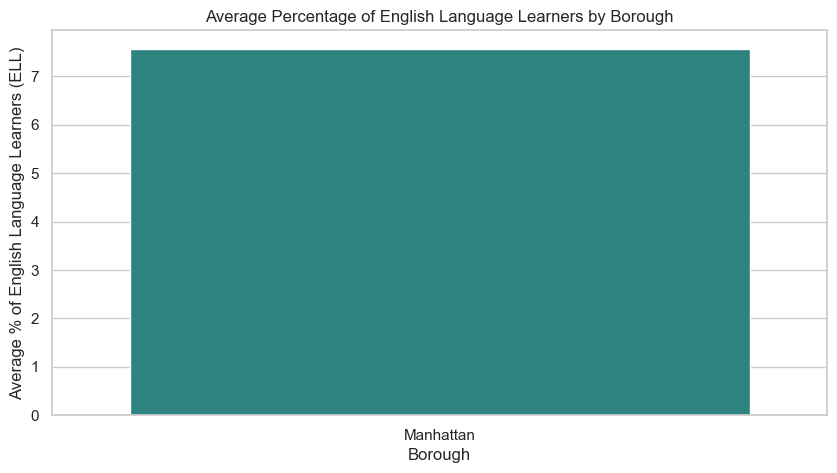

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df_ell, x='borough', y='avg_ell_percent', palette='viridis')

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Average % of English Language Learners (ELL)')
plt.title('Average Percentage of English Language Learners by Borough')

# Show the plot
plt.show()


## 🧠 Insights

# Write your observations, findings, and answers to the task questions here.

# The boroughs differ significantly in the number of schools and their student demographics.
# Queens has the highest concentration of English Language Learners.
# Each borough has standout schools with high special education needs, indicating where specialized support is most critical.